# Camera Calibration



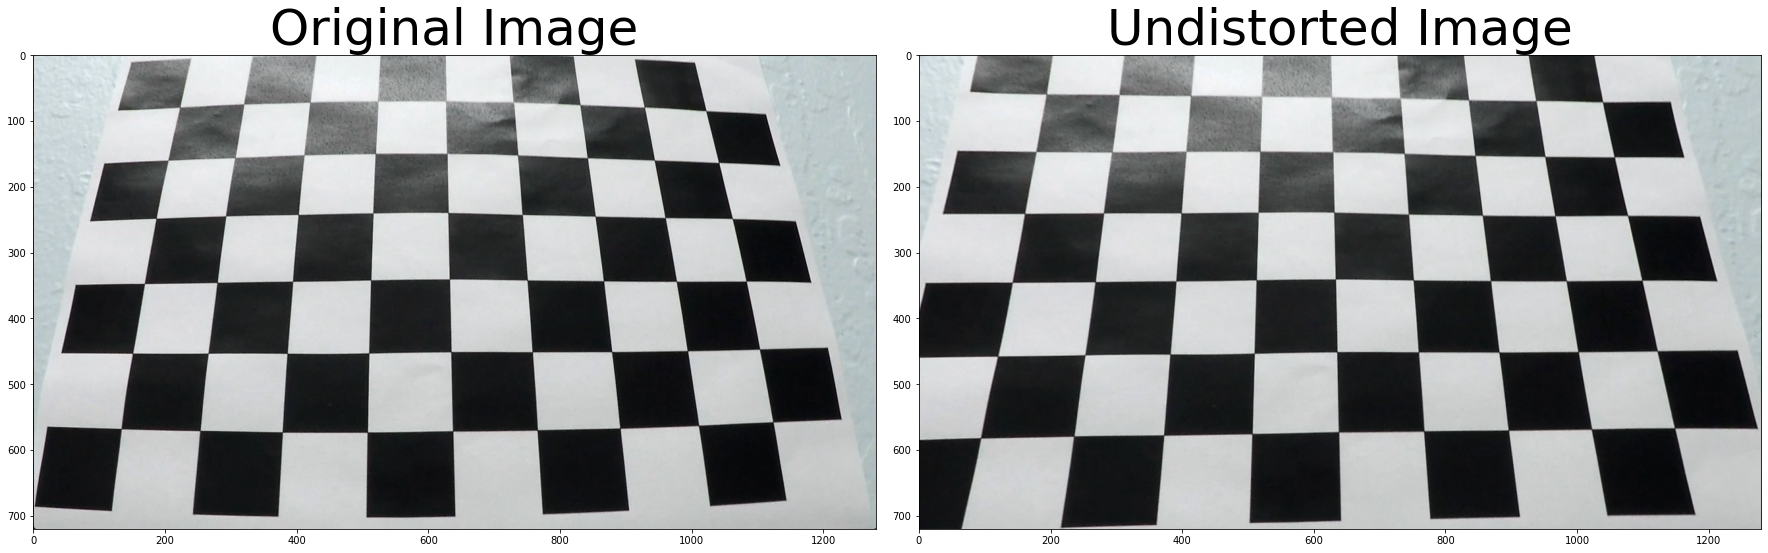

In [2]:
import cv2
import glob
import pickle
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 

#images of the chessboard
calib_files = glob.glob('camera_cal/calibration*.jpg')

#parameters of the chessboard
nx = 9
ny = 6
#coordinates of the chessboard
objp = np.zeros((nx*ny,3),np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2) # x, y coordinates in chessboard frame

#vectors to store image-real world correspondances
obj_points = [] # 3D points in real world space 
img_points = [] # 2D points in image plane

for fname in calib_files:
    
    #reading images
    img = cv2.imread(fname)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, draw corners
    if ret == True:
        obj_points.append(objp)
        img_points.append(corners)


#calculating camera calibration parameters
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points,img_points, gray.shape[::-1],None,None)

#undistorting a test image and saving it
img = cv2.imread('camera_cal/calibration3.jpg')
dst = cv2.undistort(img, mtx, dist, None, mtx)
mpimg.imsave('result_images/calibration3_dst.jpg', dst)

#displaying the images 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize = 50)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize = 50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom= 0.)        

#store camera calibration
with open('camera_parameters.pickle', 'wb') as f:
    pickle.dump([mtx, dist], f)
    

    

# Birdeye view of the road


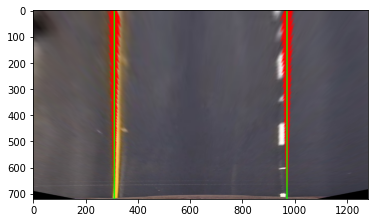

In [39]:
# Four source coordinates
src = np.float32([[202,719],[592, 452],[692,452],[1123,719]])

# Four desired coordinates
dst = np.float32([[310,720],[310,0],[970,0],[970,720]])

# Compute the perspective transform, M
M = cv2.getPerspectiveTransform(src,dst)
Minv = cv2.getPerspectiveTransform(dst,src)
    
#reading test image
img = mpimg.imread('test_images/straight_lines1.jpg')
img_size = img.shape[0:2]

# undistort the image 
dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.line(dst, (202,719), (592, 452), (255, 0, 0), thickness=2, lineType=8)
cv2.line(dst, (692,452), (1123,719), (255, 0, 0), thickness=2, lineType=8)
mpimg.imsave('result_images/straight_lines1.jpg', dst)

# Create warped image = uses linear interpolation
warped = cv2.warpPerspective(dst, M, (img.shape[1], img.shape[0]), flags = cv2.INTER_LINEAR)
cv2.line(warped, (310,720), (310,0), (0, 255, 0), thickness=3, lineType=8)
cv2.line(warped, (970,0), (970,720), (0, 255, 0), thickness=3, lineType=8)
plt.imshow(warped)
mpimg.imsave('result_images/straight_lines1_bev.jpg', warped)

#store camera calibration
with open('p_transformation.pickle', 'wb') as f:
    pickle.dump([M, Minv], f)
